# Iris classification
**Iris flower has three species : Setosa, Versicolorand Virginica. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, we will try to classify each flower.**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [6]:
data=datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data['data'] [:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
pd.DataFrame(data['data'] , columns= data['feature_names'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_table=pd.DataFrame(data['data'] , columns= data['feature_names'])

In [13]:
iris_table['target']=data['target']
iris_table['target_names']=iris_table['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
iris_table.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploratory data analysis

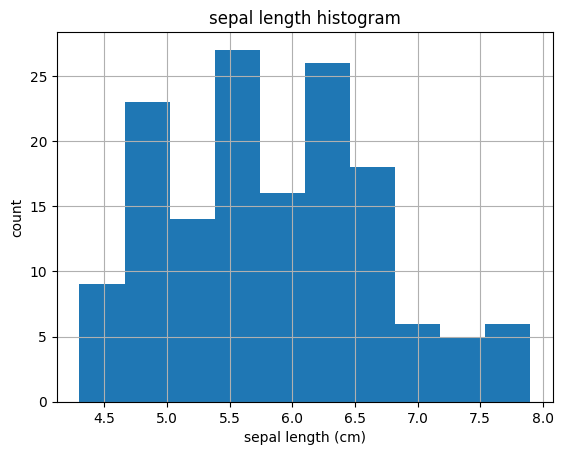

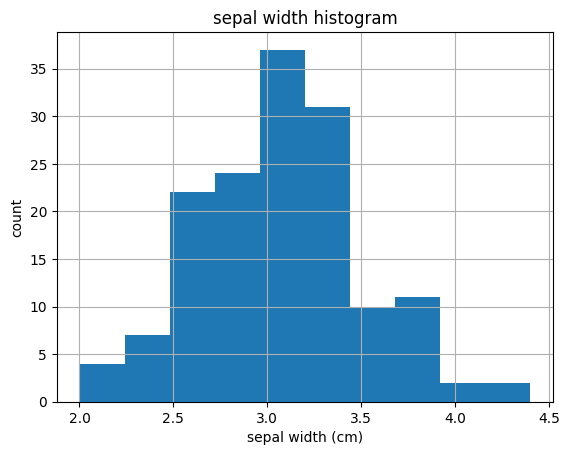

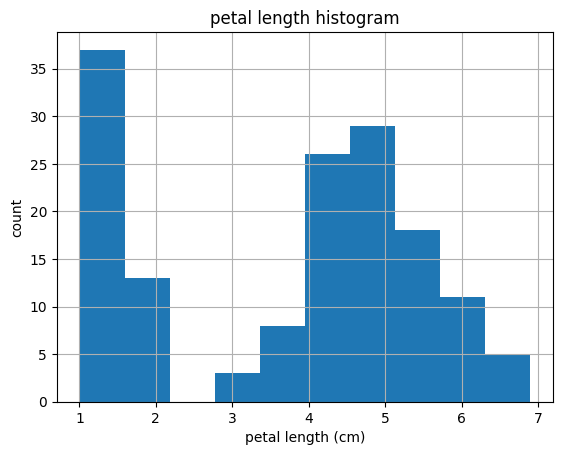

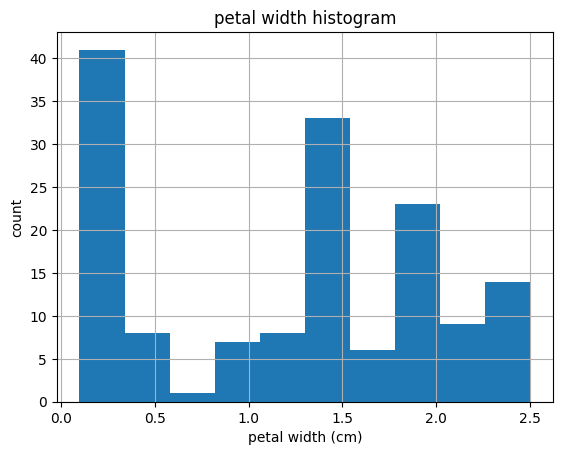

In [15]:
%matplotlib inline
iris_table['sepal length (cm)'].hist()
plt.xlabel('sepal length (cm)')
plt.ylabel('count')
plt.title('sepal length histogram')
plt.show()
iris_table['sepal width (cm)'].hist()
plt.xlabel('sepal width (cm)')
plt.ylabel('count')
plt.title('sepal width histogram')
plt.show()

iris_table['petal length (cm)'].hist()
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.title('petal length histogram')
plt.show()

iris_table['petal width (cm)'].hist()
plt.xlabel('petal width (cm)')
plt.ylabel('count')
plt.title('petal width histogram')
plt.show()

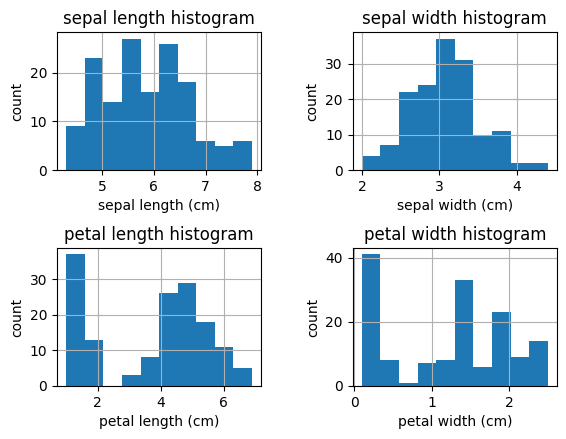

In [16]:
fig, measurements = plt.subplots(2, 2)
fig.tight_layout(pad=3.5)

measurements[0, 0].set_title('sepal length histogram')
measurements [0, 1].set_title('sepal width histogram')
measurements [1, 0].set_title('petal length histogram')
measurements[1, 1].set_title('petal width histogram')
plt.subplot(2,2,1)
iris_table['sepal length (cm)'].hist()
plt.xlabel('sepal length (cm)')
plt.ylabel('count')

plt.subplot(2,2,2)
iris_table['sepal width (cm)'].hist()
plt.xlabel('sepal width (cm)')
plt.ylabel('count')

plt.subplot(2,2,3)
iris_table['petal length (cm)'].hist()
plt.xlabel('petal length (cm)')
plt.ylabel('count')

plt.subplot(2,2,4)
iris_table['petal width (cm)'].hist()
plt.xlabel('petal width (cm)')
plt.ylabel('count')

plt.show()

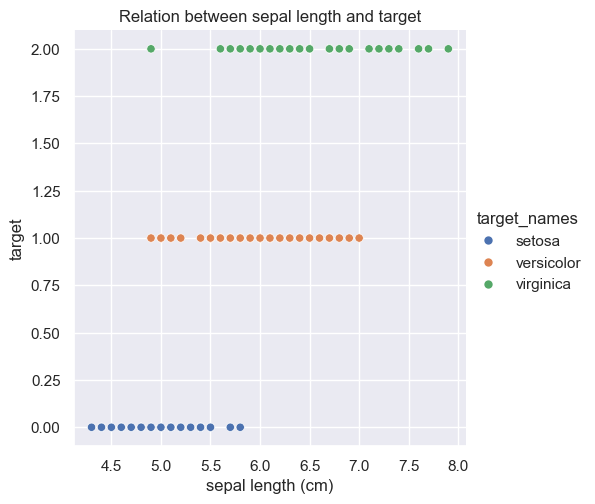

In [17]:
sns.set()
sns.relplot(x='sepal length (cm)',y='target', hue='target_names', data=iris_table)
plt.title('Relation between sepal length and target')
plt.show()

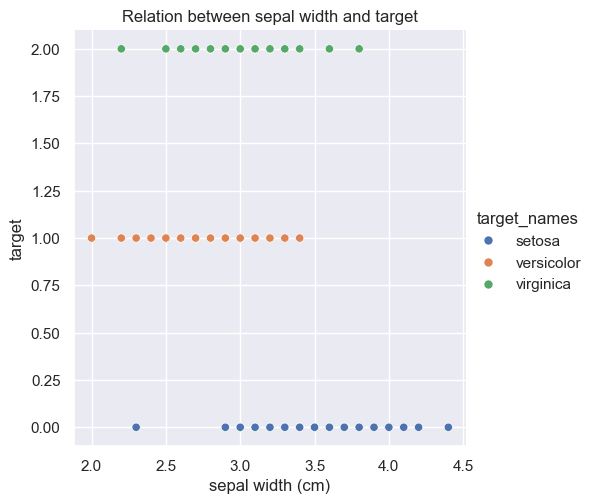

In [18]:
sns.relplot(x='sepal width (cm)',y='target', hue='target_names', data=iris_table)
plt.title('Relation between sepal width and target')
plt.show()

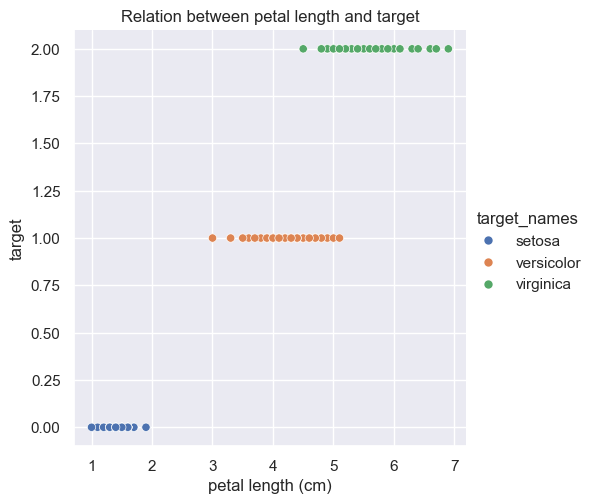

In [19]:
sns.relplot(x='petal length (cm)',y='target', hue='target_names', data=iris_table)
plt.title('Relation between petal length and target')
plt.show()

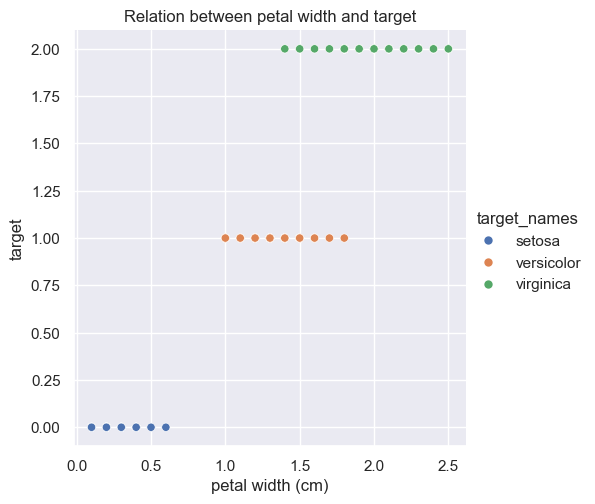

In [20]:
sns.relplot(x='petal width (cm)',y='target', hue='target_names', data=iris_table)
plt.title('Relation between petal width and target')
plt.show()

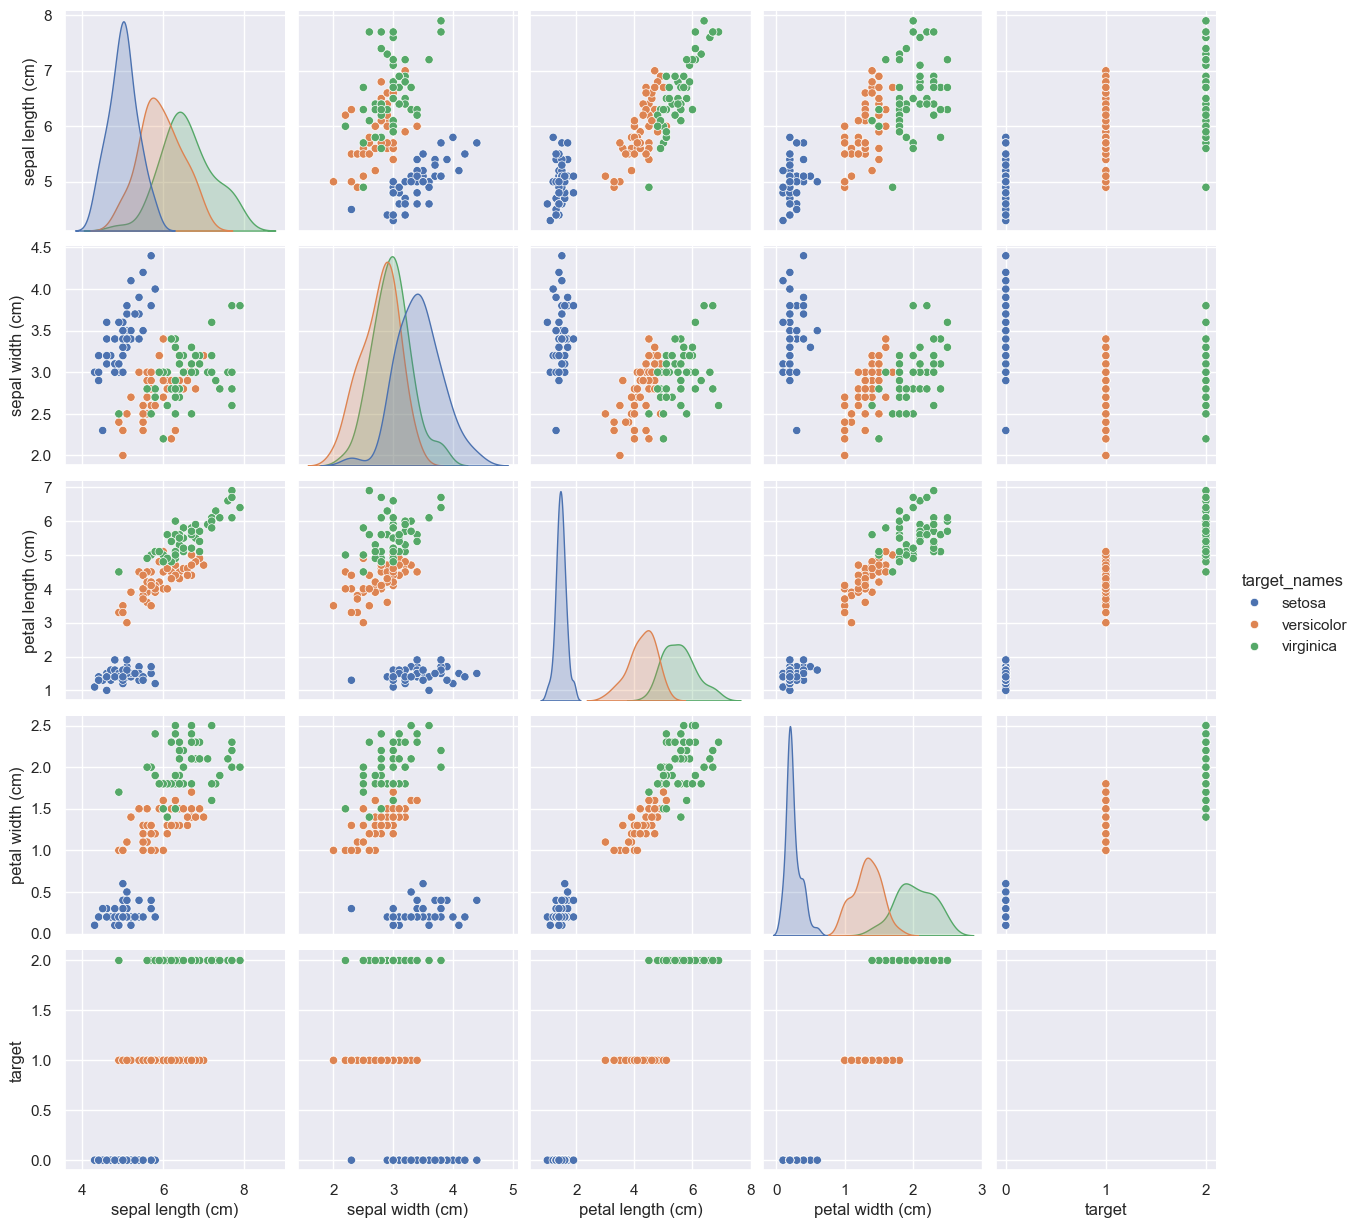

In [22]:
sns.pairplot(iris_table , hue='target_names')


## Train Test split (prepare data for modeling)

In [23]:
iris_train, iris_test= train_test_split( iris_table, test_size =0.25)

In [24]:
iris_train.shape , iris_test.shape

((112, 6), (38, 6))

In [25]:
input_data=iris_train.drop(columns=['target','target_names']).values

In [26]:
target_value=iris_train['target'].values

# Modeling

**1st prototype (simplest model tree spilt)** 

In [27]:
def fisrt_prototype(petal_width):
    if petal_width < 0.75:
        return 0
    elif petal_width < 1.55:
        return 1
    else :
        return 2

output=np.array([fisrt_prototype(val) for val in input_data[:,3]])


In [28]:
output==target_value

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [29]:
output==target_value
percentage=np.mean(output==target_value)*100
print ('accuracy=', percentage,'%')

accuracy= 92.85714285714286 %


# Modeling with Decision Tree Classifier

In [30]:
model= DecisionTreeClassifier()
model.fit(input_data,target_value)
model.score(input_data,target_value)*100

100.0

_**when we test the model with same data we trained on , not efficient ,it would just learn the data and give 100% accuracy.**_

In [31]:
x1,x2,y1,y2= train_test_split(input_data,target_value, test_size =0.25)

In [32]:
x1.shape,y1.shape,x2.shape,y2.shape

((84, 4), (84,), (28, 4), (28,))

In [33]:
model= DecisionTreeClassifier()
model.fit(x1,y1)
model.score(x2,y2)*100

96.42857142857143

## Cross Validation

In [34]:
model= DecisionTreeClassifier()
cross_val_score(model,input_data,target_value, cv=6)

array([1.        , 0.94736842, 0.89473684, 0.89473684, 0.94444444,
       1.        ])

In [35]:
np.mean(cross_val_score(model,input_data,target_value, cv=6))*100

93.81091617933723

In [36]:
practical_output=cross_val_predict(model,input_data,target_value, cv=6)

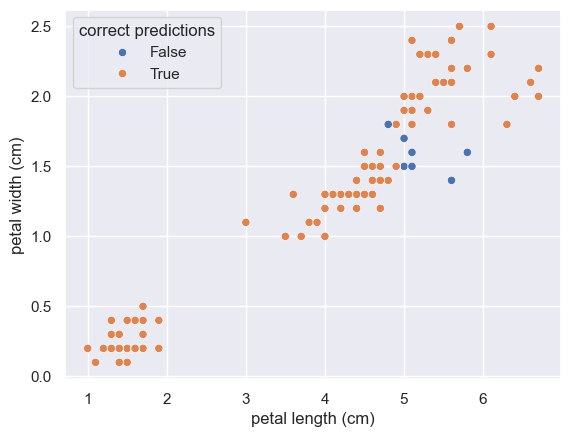

In [37]:
predictions=practical_output==target_value
iris_predicted=iris_train.copy()
iris_predicted['correct predictions']=predictions
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='correct predictions', data=iris_predicted)
plt.show()

In [38]:
model= DecisionTreeClassifier()
cross_val_score(model,input_data,target_value, cv=6)
np.mean(cross_val_score(model,input_data,target_value, cv=6))*100

94.68810916179336

# Modeling with Logistic Regression

In [41]:
model= LogisticRegression()
cross_val_score(model,input_data,target_value, cv=6)


array([1.        , 0.94736842, 0.89473684, 0.94736842, 0.94444444,
       1.        ])

In [44]:
np.mean(cross_val_score(model,input_data,target_value, cv=6))*100

95.56530214424951

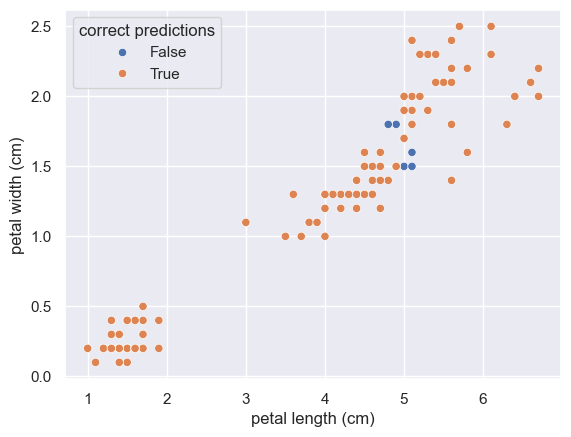

In [43]:
practical_output=cross_val_predict(model,input_data,target_value, cv=6)
predictions=practical_output==target_value
iris_predicted=iris_train.copy()
iris_predicted['correct predictions']=predictions
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='correct predictions', data=iris_predicted)
plt.show()

## Final test 

In [45]:
testing_input=iris_test.drop(columns=['target','target_names']).values
testing_target=iris_test['target'].values

In [46]:
testing_input.shape

(38, 4)

In [47]:
testing_target

array([2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2])

In [59]:
model= LogisticRegression()
model.fit(input_data,target_value)
xyz=model.predict(testing_input)
yz=xyz==testing_target
np.mean(yz)*100

92.10526315789474

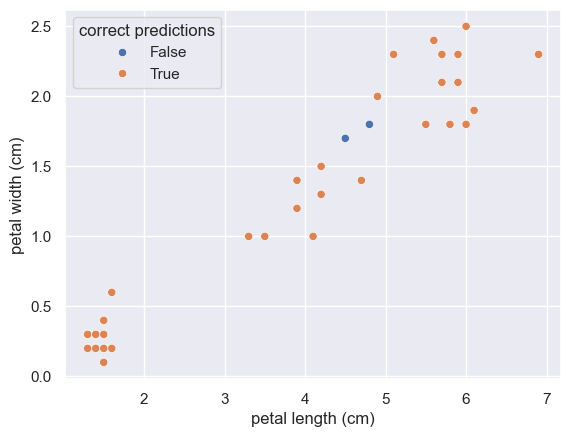

In [58]:
xyz=model.predict(testing_input)
yz=xyz==testing_target
iris_predicted2=iris_test.copy()
iris_predicted2['correct predictions']=yz
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='correct predictions', data=iris_predicted2)
plt.show()

**We got a 92% Accuracy on unseen data by the logistic regression model**